## 공공데이터 활용 서울 스타벅스 시각화

**환경**

- Mac Os
- Python 3.9.4 (default, Apr  9 2021, 09:32:38)

**데이터 개요**

- 2021년 9월 30일 기준
- 상권업종중분류명이 "커피점/카페"로 등록된 카페 (제과/제빵은 포함하지 않았음)
- 데이터 출처 :
    - 공공데이터포털(data.go.kr) : 소상공인시장진흥공단_상가(상권)정보
    - https://www.data.go.kr/data/15083033/fileData.do

**프로젝트 개요**

- 공공데이터를 활용하여 서울의 스타벅스에 대한 다양한 시각화를 통해 분석해보고자 한다.(연습)

**프로젝트 상세**

- barplot과 pieplot을 통해 서울 스타벅스 점포 수를 시각화 해보고자 한다.
- folium 패키지를 활용하여 지도 위에 서울의 스타벅스 분포 정도를 시각화 해보고자 한다.
- folium documentation : https://python-visualization.github.io/folium/index.html


In [1]:
# 기초 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# pd.options.display.max_rows=100
# pd.options.display.max_columns=100
# pd.set_option('display.float_format','{:.4f}'.format)

## 1. Load Dataset

In [2]:
# 임시로 하나만 우선 살펴보기
temp = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_서울_202109.csv", encoding='utf-8')
temp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,전화번호,경도,위도,상권번호,데이터기준일자
0,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,138110,5768.0,NaN,1,NaN,02-400-5888,127.147321,37.493054,NaN,2017-08-04
1,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,150035,7250.0,NaN,1,NaN,02-2671-8221,126.907168,37.520613,9243.0,2016-01-26
2,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,133849,4803.0,NaN,NaN,NaN,02-2244-2122,127.049018,37.566857,NaN,2016-01-26
3,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,156816,7008.0,NaN,NaN,NaN,NaN,126.980952,37.487105,9347.0,2021-01-09
4,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,110858,3150.0,NaN,NaN,NaN,NaN,126.981794,37.572387,9184.0,2021-10-16


In [3]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용
from glob import glob

# csv 목록 불러오기
file_names = glob("data/*.csv")
# file_names
total = pd.DataFrame()
# 모든 csv 병합
for file_name in file_names:
    temp = pd.read_csv(file_name, encoding='utf-8')
    total = pd.concat([total, temp])

# reset index
total.reset_index(inplace=True, drop=True)
total.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,전화번호,경도,위도,상권번호,데이터기준일자
0,24536268,대건모터스,NaN,D,소매,D23,자동차/자동차용품,D23A06,자동차부품판매,G45219,...,330070.0,31187.0,NaN,1.0,NaN,041-558-9636,127.163942,36.801016,NaN,2017-09-30
1,17174097,구오,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,356805.0,31989.0,NaN,1.0,NaN,NaN,126.447467,36.774691,10328.0,2021-10-17
2,21684400,한윤희국어논술학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,355011.0,33443.0,NaN,2.0,NaN,041-931-0678,126.599967,36.360449,NaN,2016-11-08
3,20218177,삽다리식당,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,330871.0,31258.0,NaN,NaN,NaN,041-523-3116,127.354533,36.779953,NaN,2016-01-26
4,17174606,어야족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,331984.0,31164.0,NaN,NaN,NaN,0415674422,127.107954,36.804178,10205.0,2021-10-17


In [4]:
total.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', 'PNU코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '전화번호', '경도', '위도', '상권번호', '데이터기준일자'],
      dtype='object')

In [5]:
# 분석에 필요한 column 고르기
data_columns = ['상가업소번호', '상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '경도', '위도', '데이터기준일자'] 
data = total[data_columns]
data.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,24536268,대건모터스,NaN,소매,자동차/자동차용품,충청남도,천안시 동남구,원성2동,127.163942,36.801016,2017-09-30
1,17174097,구오,NaN,음식,한식,충청남도,서산시,부춘동,126.447467,36.774691,2021-10-17
2,21684400,한윤희국어논술학원,NaN,학문/교육,학원-보습교습입시,충청남도,보령시,대천1동,126.599967,36.360449,2016-11-08
3,20218177,삽다리식당,NaN,음식,한식,충청남도,천안시 동남구,동면,127.354533,36.779953,2016-01-26
4,17174606,어야족발,NaN,음식,한식,충청남도,천안시 서북구,불당동,127.107954,36.804178,2021-10-17


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245938 entries, 0 to 2245937
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상가업소번호    int64  
 1   상호명       object 
 2   지점명       object 
 3   상권업종대분류명  object 
 4   상권업종중분류명  object 
 5   시도명       object 
 6   시군구명      object 
 7   행정동명      object 
 8   경도        float64
 9   위도        float64
 10  데이터기준일자   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 188.5+ MB


In [7]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245938 entries, 0 to 2245937
Data columns (total 42 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      float64
 18  법정동명       object 
 19  PNU코드      int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      float64
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 

In [8]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거한다.
del total

In [9]:
total.head() # 삭제 완료.

NameError: name 'total' is not defined

## 2. Data Exploration

#### 전국 커피 전문점 

In [10]:
# set(data['상권업종대분류명'])
set(data['상권업종중분류명'])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 

In [11]:
# 상권업종중분류명이 "커피점/카페" 인 곳
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]
# index 다시 세팅
df_coffee.index = range(len(df_coffee))

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  102539


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,25262482,웅천다방,NaN,음식,커피점/카페,충청남도,보령시,웅천읍,126.598675,36.234105,2021-10-17
1,20786700,짚핑이글스카이,NaN,음식,커피점/카페,충청남도,금산군,진산면,127.341169,36.125432,2016-10-30
2,20263043,카페이레,NaN,음식,커피점/카페,충청남도,천안시 동남구,일봉동,127.138756,36.791563,2021-10-17
3,20402338,광다방,NaN,음식,커피점/카페,충청남도,부여군,세도면,126.946438,36.170269,2021-10-18
4,23211828,코코다방,NaN,음식,커피점/카페,충청남도,논산시,취암동,127.088526,36.204827,2016-01-26


#### 서울내 커피 전문점 

In [12]:
set(data["시도명"])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [13]:
# 커피전문점 중에 "서울"에 위치하고 있는 점포만 뽑아낸다.
df_seoul_coffee = df_coffee[df_coffee["시도명"] == "서울특별시"]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head()

서울시 내 커피 전문점 점포 수 : 19703


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,20659878,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동,127.000171,37.583149,2017-10-26
1,20676428,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동,127.034746,37.658728,2017-10-27
2,20695531,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동,126.929692,37.554599,2017-08-24
3,23260840,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동,126.813358,37.580941,2021-10-16
4,28491095,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동,126.842935,37.522055,2017-08-25


#### 전국 스타벅스

In [14]:
# 스타벅스 상호를 가진 모든 커피전문점
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

전국 스타벅스 점포 수 : 1529


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,20522826,스타벅스,천안이마트점,음식,커피점/카페,충청남도,천안시 서북구,쌍용1동,127.127098,36.795921,2020-09-08
1,12089021,스타벅스천안ICDT점,천안ICDT점,음식,커피점/카페,충청남도,천안시 동남구,신안동,127.161502,36.820275,2017-10-08
2,23207290,스타벅스,공주신관점,음식,커피점/카페,충청남도,공주시,신관동,127.140022,36.474578,2020-09-08
3,25417167,스타벅스,천안성정DT,음식,커피점/카페,충청남도,천안시 서북구,성정2동,127.140293,36.825413,2020-11-19
4,20247834,스타벅스,천안신부동더샵점,음식,커피점/카페,충청남도,천안시 동남구,신안동,127.153039,36.819314,2020-09-08


#### 서울 스타벅스

In [15]:
# 서울에 있는 스타벅스
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 488


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,20585779,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,127.003887,37.582964,2017-10-26
1,20015708,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동,127.014198,37.484386,2021-10-16
2,20666449,스타벅스,현대목동점,음식,커피점/카페,서울특별시,양천구,목1동,126.874682,37.527147,2020-07-27
3,23320126,스타벅스,당산점,음식,커피점/카페,서울특별시,영등포구,당산2동,126.899952,37.535134,2021-10-18
4,22934175,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동,127.021629,37.523184,2017-09-15


In [16]:
# 구별로 스타벅스 수를 구한다.
df_seoul_starbucks['시군구명'].value_counts()

강남구     79
중구      43
서초구     40
송파구     33
종로구     30
영등포구    28
마포구     26
용산구     23
광진구     19
서대문구    18
강서구     17
성북구     16
양천구     14
강동구     13
노원구     12
동작구     11
금천구     11
관악구     11
구로구     10
동대문구     8
중랑구      7
은평구      7
강북구      5
성동구      5
도봉구      2
Name: 시군구명, dtype: int64

## Data Visualization

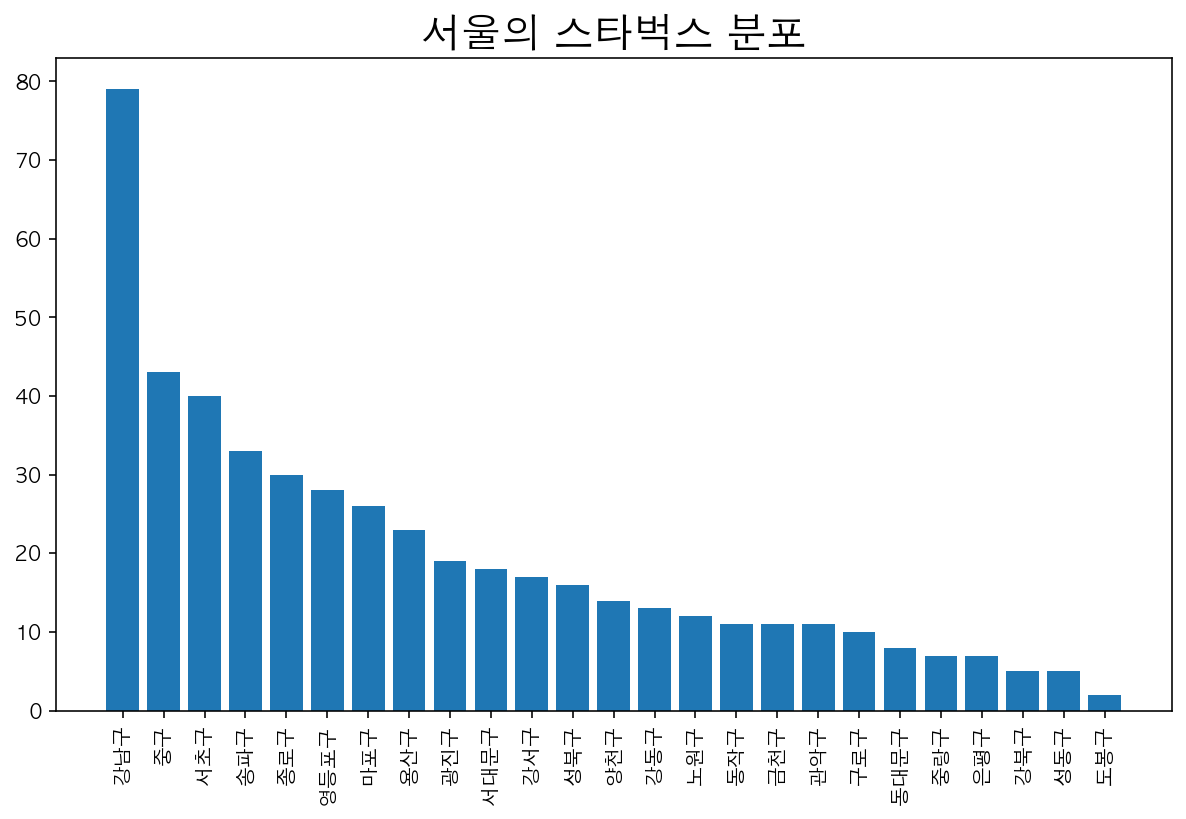

In [17]:
plt.figure(figsize=(10, 6))
plt.title("서울의 스타벅스 분포", fontdict={"fontsize" : 20})
plt.bar(df_seoul_starbucks['시군구명'].value_counts().index, df_seoul_starbucks['시군구명'].value_counts().values)
plt.xticks(rotation='vertical')
# plt.xticks(rotation='horizontal')
plt.savefig("starbucks_barplot.png")
plt.show()

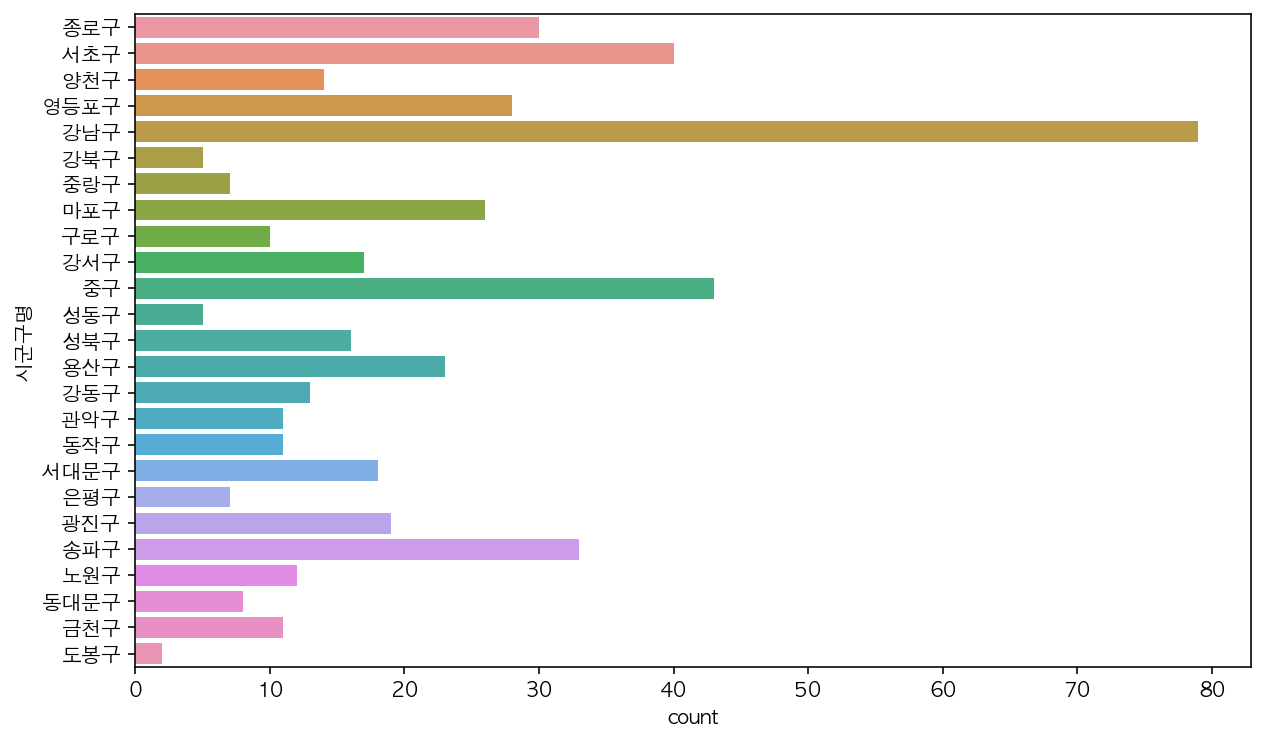

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df_seoul_starbucks, y='시군구명')
plt.savefig("starbucks_countplot.png")
plt.show()

In [19]:
# 땅값, 회사 수 등과 비교 가능 스타벅스와 관계.(회귀분석, 상관관계 분석)

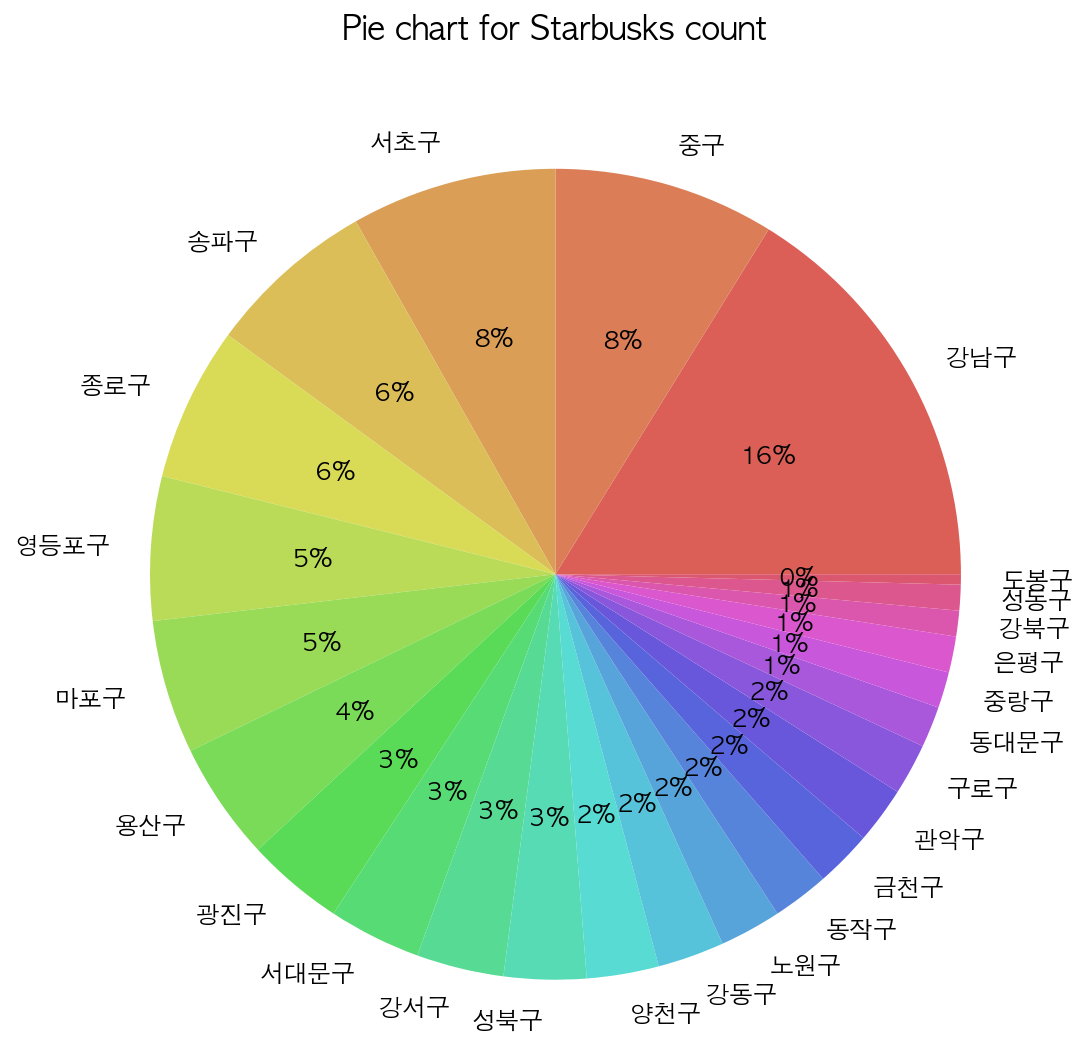

In [20]:
plt.figure(figsize=(8,8))
plt.pie(df_seoul_starbucks['시군구명'].value_counts().values,
        labels=df_seoul_starbucks['시군구명'].value_counts().index,
        autopct='%d%%',
        colors=sns.color_palette('hls',len(df_seoul_starbucks['시군구명'].value_counts().index)),
        textprops={'fontsize':12})
plt.axis('equal')
plt.title("Pie chart for Starbusks count", fontsize=16, pad=50)
plt.savefig("starbucks_piechart.png")
plt.show()

### 지도 위에 시각화하기

In [21]:
df_seoul_starbucks.head(1)

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도,데이터기준일자
0,20585779,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동,127.003887,37.582964,2017-10-26


In [22]:
# 스타벅스가 어디에 있는지 경도와 위도를 활용해 나타냅니다.
df_seoul_starbucks[["지점명", "경도", "위도"]]

,지점명,경도,위도
0,동숭로아트점,127.003887,37.582964
1,남부터미널2점,127.014198,37.484386
2,현대목동점,126.874682,37.527147
3,당산점,126.899952,37.535134
4,가로수길점,127.021629,37.523184
...,...,...,...
483,강남세곡점,127.099909,37.467265
484,대치한티점,127.052091,37.498518
485,중곡점,127.079207,37.557689
486,목동10단지점,126.859587,37.515396


In [28]:
# !pip install folium
import folium

# 중심 지정
lat = df_seoul_starbucks['위도'].mean()
long = df_seoul_starbucks['경도'].mean()

m = folium.Map([lat, long], zoom_start=11)

# 지도위에 표시
for i in df_seoul_starbucks.index:
    sub_lat = df_seoul_starbucks.loc[i, '위도']
    sub_long = df_seoul_starbucks.loc[i, '경도']
    
    title = df_seoul_starbucks.loc[i, '지점명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat, sub_long], tooltip = title).add_to(m)

m.save('starbucks_mark.html')
m

In [29]:
# 동그라미 마크 표시하기
m = folium.Map([lat, long], zoom_start=11, tiles='OpenStreetMap') #tiles = 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain'

for i in df_seoul_starbucks.index:
    sub_lat = df_seoul_starbucks.loc[i, '위도']
    sub_long = df_seoul_starbucks.loc[i, '경도']
    
    title = df_seoul_starbucks.loc[i, '지점명']
    
    folium.CircleMarker([sub_lat, sub_long], color='green', radius = 4, tooltip = title).add_to(m)

m.save('starbucks_cmark.html')
m

In [25]:
# 코로플레스를 위한 시/군/구별 좌표 json파일 가져오기
import json

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [26]:
df_seoul_starbucks_count = pd.pivot_table(df_seoul_starbucks, index='시군구명', values='상가업소번호', aggfunc='count')

In [27]:
# 코로플레스 지도 그리기
m = folium.Map(location=[lat, long], zoom_start=11, tiles='Stamen Toner')  #tiles = 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain'

m.choropleth(
    geo_data = geo_str,
    data = df_seoul_starbucks_count['상가업소번호'],
    columns = ['시군구명','상가업소번호'],
               fill_color = 'YlGn', # 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
               key_on = 'feature.properties.name',
               legend_name='Number of Parking lots (%)')

m.save('starbucks_choropleth.html')
m

## 결론

**프로젝트에 대하여**

- 공공데이터셋은 모든 상권 데이터가 들어있지만, 빠른 연습을 위해 서울에 있는 스타벅스 데이터만 뽑아서 진행하였다.
- 간단한 결과이고 특별한 관찰은 없었지만, 그래프 시각화와 지도 시각화를 진행해보았다.


**관찰 결과**

- 강남구, 중구, 서초구, 송파구, 종로구 등 순으로 스타벅스가 많이 들어서 있다.
- 특별한 관찰 결과는 없다. 연습이기 때문.

**Develop Project**

- 다양한 분석을 시행할 수 있으며, 땅값, 회사 수 등과 스타벅스 입점 수와의 상관관계를 살펴볼 수도 있울 것이다.
- 스타벅스 뿐아니라 다른 브랜드에 대해서도 분석해볼 수 있다.
- 프랜차이즈 비율에 대해서도 살펴볼 수 있다.
- 커피전문점이 아닌 다른 항목에 대해서도 분석해볼 수 잇다.